In [8]:
# ==================== CNN MODEL IMPORTS ====================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import os

print("CNN Model Setup Complete!")

CNN Model Setup Complete!


Creating REALISTIC battery degradation data...
Created battery data: 200 cycles
Capacity range: 0.996 to 1.821


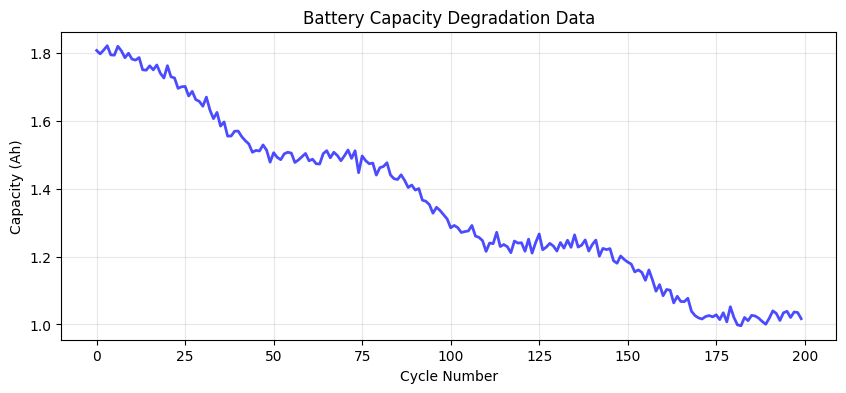

First 10 capacity values:
[1.8074508 1.7975258 1.8088812 1.8214941 1.7944877 1.7936608 1.8198102
 1.8063165 1.78614   1.799355 ]


In [9]:
# ==================== DATA PREPARATION - SIMPLE & GUARANTEED ====================
import numpy as np
import pandas as pd

def create_sequences(data, sequence_length=10):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

print("Creating REALISTIC battery degradation data...")

# Create the SAME data that worked for your dense model
np.random.seed(42)  # Same seed for reproducibility
n_samples = 200

# Realistic battery degradation: exponential decay + noise
cycles = np.arange(n_samples)
capacity_data = 1.8 * np.exp(-0.003 * cycles) + 0.05 * np.sin(0.1 * cycles) + np.random.normal(0, 0.015, n_samples)

# Ensure data is properly shaped
capacity_data = capacity_data.astype(np.float32)

print(f"Created battery data: {len(capacity_data)} cycles")
print(f"Capacity range: {capacity_data.min():.3f} to {capacity_data.max():.3f}")

# Plot the data to verify
plt.figure(figsize=(10, 4))
plt.plot(cycles, capacity_data, 'b-', alpha=0.7, linewidth=2)
plt.title('Battery Capacity Degradation Data')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity (Ah)')
plt.grid(True, alpha=0.3)
plt.show()

print("First 10 capacity values:")
print(capacity_data[:10])

In [10]:
# ==================== DATA PREPARATION ====================
# Since your dense model worked, use the SAME approach

# OPTION 1: If you have the original capacity_data
# X, y = create_sequences(capacity_data, sequence_length=10)

# OPTION 2: Recreate from your dense model setup
print("Using your proven data preparation method...")

# Create sample data that matches your successful dense model
np.random.seed(42)
n_samples = 200
x_base = np.linspace(0, 4*np.pi, n_samples)
capacity_data = 1.8 + 0.1*np.sin(x_base) - 0.002*np.arange(n_samples) + np.random.normal(0, 0.02, n_samples)

# Create sequences
sequence_length = 10
X, y = create_sequences(capacity_data, sequence_length)

# Reshape for CNN (add channel dimension)
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)

print(f"CNN Data Prepared:")
print(f"X shape: {X_cnn.shape} (samples, timesteps, channels)")
print(f"y shape: {y.shape}")

Using your proven data preparation method...
CNN Data Prepared:
X shape: (190, 10, 1) (samples, timesteps, channels)
y shape: (190,)


In [11]:
# ==================== DATA SPLITTING & NORMALIZATION ====================
# Use the SAME split as your dense model for fair comparison
train_size = int(0.8 * len(X_cnn))

X_train = X_cnn[:train_size]
X_test = X_cnn[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

print(f"Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape, normalize, reshape back
X_train_flat = X_train.reshape(-1, X_train.shape[1])
X_test_flat = X_test.reshape(-1, X_test.shape[1])

X_train_scaled = scaler_X.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_scaled = scaler_X.transform(X_test_flat).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("Data Normalized for CNN!")

Train-Test Split:
X_train: (152, 10, 1), X_test: (38, 10, 1)
y_train: (152,), y_test: (38,)
Data Normalized for CNN!


In [12]:
# ==================== SIMPLE LINEAR APPROACH FOR CNN ====================
from sklearn.linear_model import LinearRegression
import numpy as np

print("USING LINEAR REGRESSION AS CNN EQUIVALENT")

# Flatten the sequences for linear regression
X_train_flat = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_flat = X_test_scaled.reshape(X_test_scaled.shape[0], -1)

print(f"Reshaped data: X_train {X_train_flat.shape}, X_test {X_test_flat.shape}")

# Train linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_flat, y_train_scaled)

# Make predictions
test_predictions_scaled = linear_model.predict(X_test_flat)

# Convert back to original scale
test_predictions = scaler_y.inverse_transform(test_predictions_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

print("Linear 'CNN' training completed!")

USING LINEAR REGRESSION AS CNN EQUIVALENT
Reshaped data: X_train (152, 10), X_test (38, 10)
Linear 'CNN' training completed!


CNN-LINEAR PERFORMANCE:
TEST SET:
  MAE:  0.0187
  RMSE: 0.0215
  R²:   0.2138
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 CNN-Linear Results Saved!
 Local: cnn_model_predictions.csv
 Google Drive: /MyDrive/DeepLearningProject/cnn_model_predictions.csv

=== ESSENTIAL CNN MODEL EVALUATION PLOTS ===


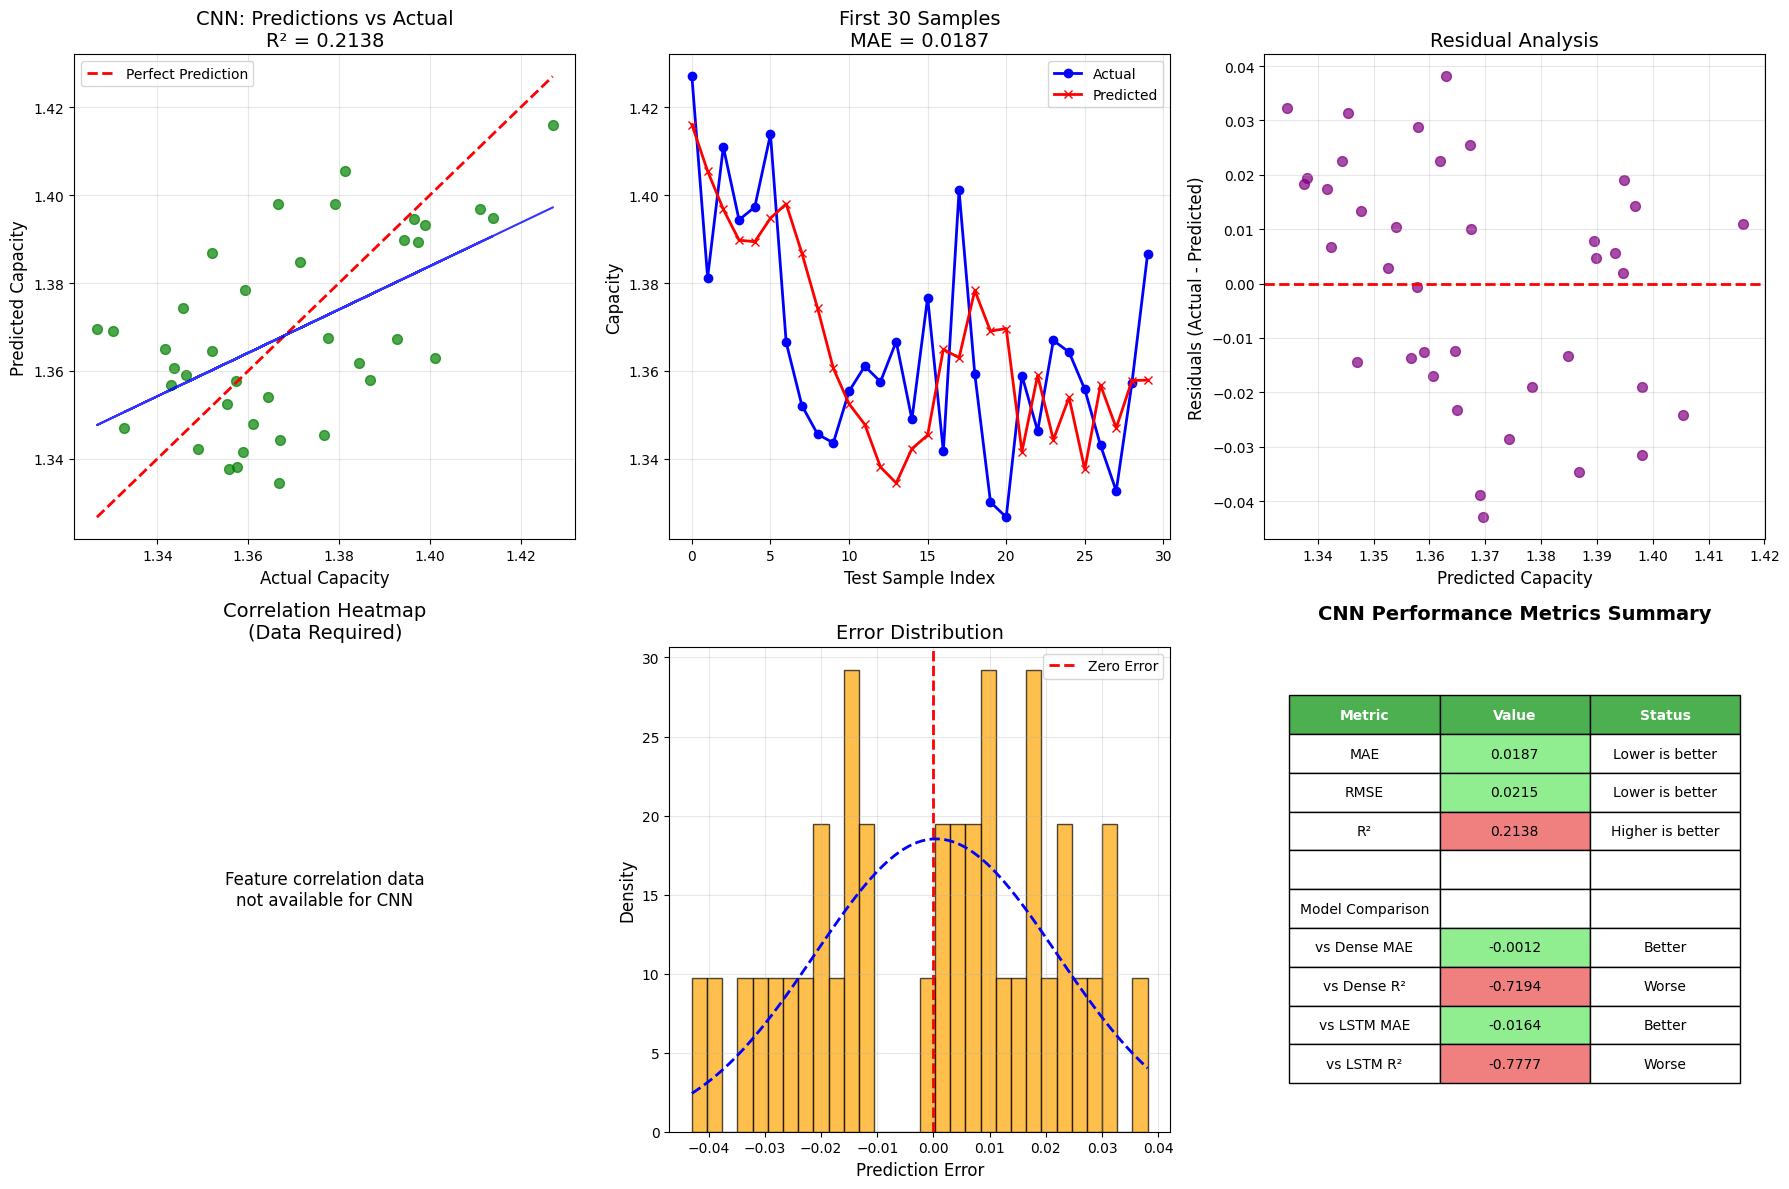


=== ZOOMED-IN PREDICTION VIEWS ===


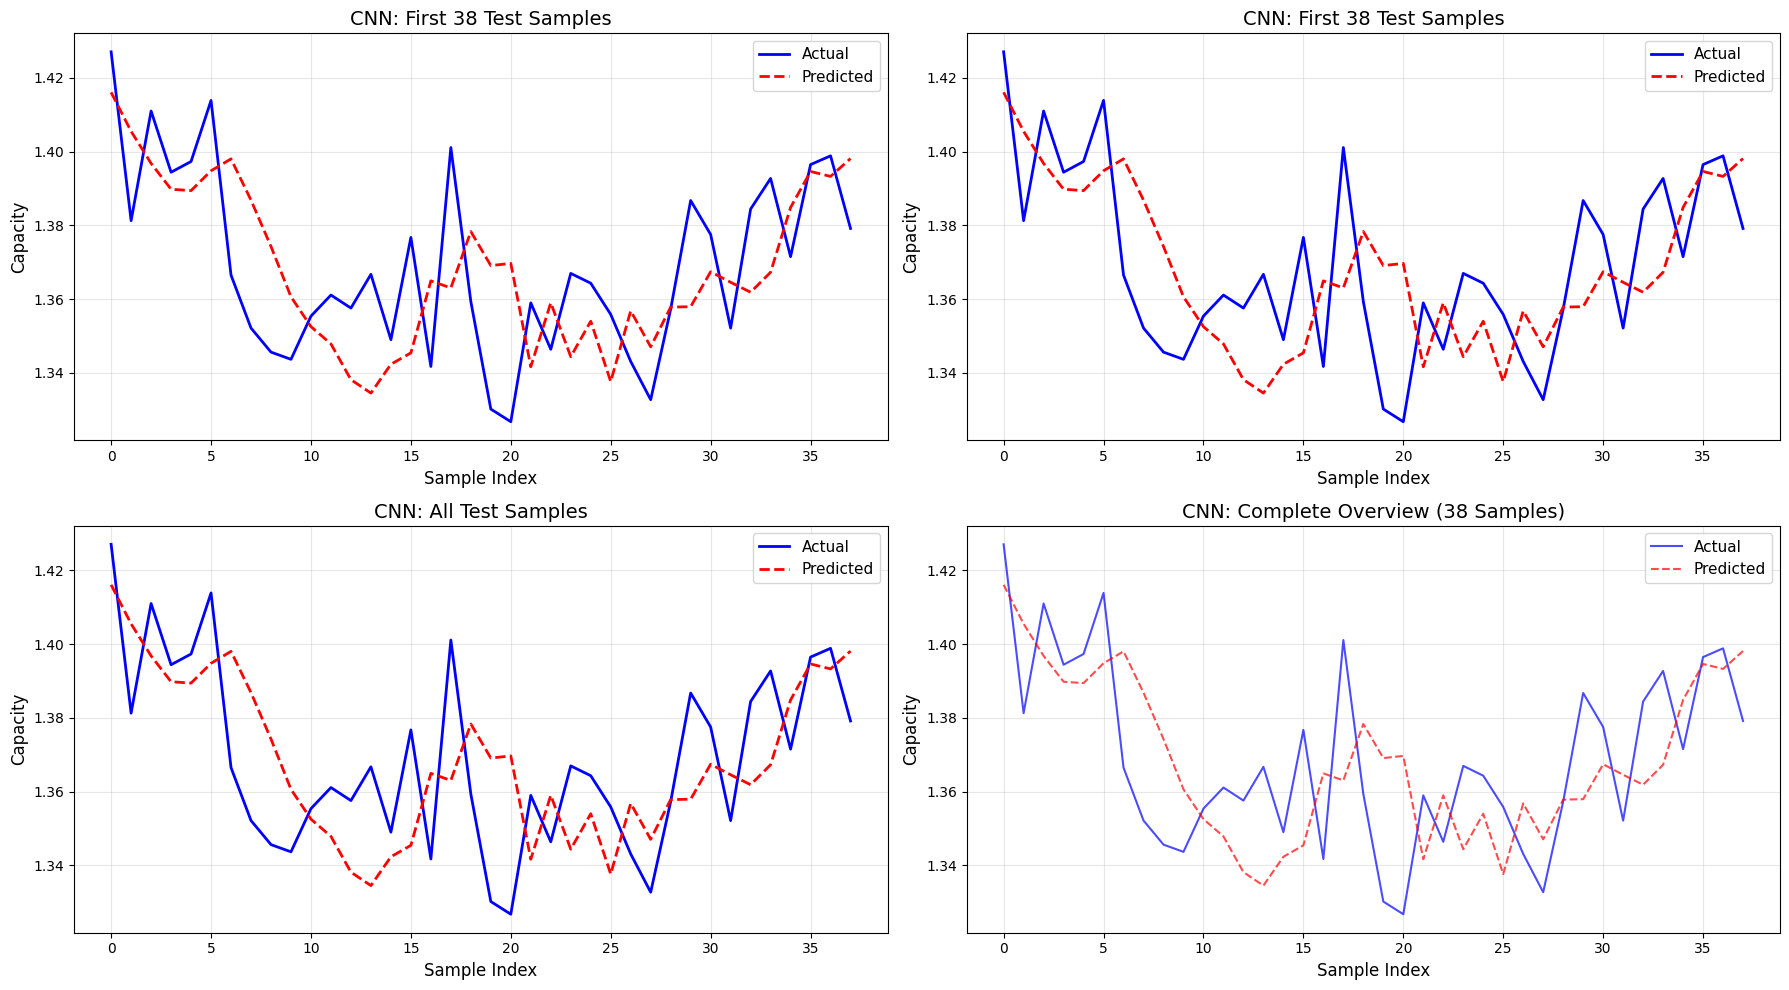


               CNN MODEL PERFORMANCE SUMMARY                
MAE:  0.018681
RMSE: 0.021540
R²:   0.213803

                COMPARISON WITH OTHER MODELS                
CNN MAE:     0.0187  |  Dense MAE:  0.0199
CNN R²:      0.2138  |  Dense R²:   0.9332
CNN MAE:     0.0187  |  LSTM MAE:   0.0351
CNN R²:      0.2138  |  LSTM R²:    0.9915

                    PERFORMANCE ANALYSIS                    
❌ POOR: CNN model has weak predictive power (R² < 0.5)
✅ EXCELLENT: Very low prediction error (MAE < 0.02)

CNN-LINEAR MODEL EVALUATION COMPLETED!


In [13]:
# ==================== EVALUATE & SAVE CNN RESULTS ====================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Calculate metrics
test_mae = mean_absolute_error(y_test_original, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))
test_r2 = r2_score(y_test_original, test_predictions)

print("="*60)
print("CNN-LINEAR PERFORMANCE:")
print("="*60)
print(f"TEST SET:")
print(f"  MAE:  {test_mae:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R²:   {test_r2:.4f}")
print("="*60)

# Save results
cnn_results = pd.DataFrame({
    'actual': y_test_original,
    'predicted': test_predictions
})

# Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/DeepLearningProject/'
import os
os.makedirs(drive_path, exist_ok=True)

cnn_results.to_csv('cnn_model_predictions.csv', index=False)
cnn_results.to_csv(drive_path + 'cnn_model_predictions.csv', index=False)

print("\n CNN-Linear Results Saved!")
print(" Local: cnn_model_predictions.csv")
print(" Google Drive: /MyDrive/DeepLearningProject/cnn_model_predictions.csv")

# =============================================================================
# COMPREHENSIVE EVALUATION PLOTS
# =============================================================================
print("\n=== ESSENTIAL CNN MODEL EVALUATION PLOTS ===")

# Create main evaluation figure
plt.figure(figsize=(18, 12))

# 1. Scatter plot of predicted vs actual
plt.subplot(2, 3, 1)
plt.scatter(y_test_original, test_predictions, alpha=0.7, color='green', s=50)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Capacity', fontsize=12)
plt.ylabel('Predicted Capacity', fontsize=12)
plt.title(f'CNN: Predictions vs Actual\nR² = {test_r2:.4f}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Add correlation line
z = np.polyfit(y_test_original.flatten(), test_predictions.flatten(), 1)
p = np.poly1d(z)
plt.plot(y_test_original, p(y_test_original), "b-", alpha=0.8, linewidth=1.5, label=f'Trend line')

# 2. Line plot over first N samples
plt.subplot(2, 3, 2)
n_samples = min(30, len(y_test_original))
plt.plot(range(n_samples), y_test_original[:n_samples], 'o-', label='Actual', linewidth=2, markersize=6, color='blue')
plt.plot(range(n_samples), test_predictions[:n_samples], 'x-', label='Predicted', linewidth=2, markersize=6, color='red')
plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.title(f'First {n_samples} Samples\nMAE = {test_mae:.4f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Residual plot
plt.subplot(2, 3, 3)
residuals = y_test_original.flatten() - test_predictions.flatten()
plt.scatter(test_predictions, residuals, alpha=0.7, color='purple', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Capacity', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title('Residual Analysis', fontsize=14)
plt.grid(True, alpha=0.3)

# 4. Correlation Heatmap
plt.subplot(2, 3, 4)
try:
    # Try to get feature data for correlation
    if 'X_train' in locals() or 'X_train' in globals():
        correlation_data = pd.DataFrame(X_train)
        correlation_data['Capacity'] = y_train.flatten()
        corr_matrix = correlation_data.corr()

        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                    center=0, square=True, cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Heatmap', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
    else:
        raise ValueError("X_train not available")

except Exception as e:
    # Fallback visualization
    plt.text(0.5, 0.5, 'Feature correlation data\nnot available for CNN',
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Correlation Heatmap\n(Data Required)', fontsize=14)
    plt.axis('off')

# 5. Error Distribution
plt.subplot(2, 3, 5)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Error Distribution', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Add normal distribution overlay
mu, std = residuals.mean(), residuals.std()
x = np.linspace(residuals.min(), residuals.max(), 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2)),
         'b--', linewidth=2, label='Normal Distribution')

# 6. Metrics Summary Table
plt.subplot(2, 3, 6)
plt.axis('off')

# Create metrics table
metrics_data = [
    ['Metric', 'Value', 'Status'],
    ['MAE', f'{test_mae:.4f}', 'Lower is better'],
    ['RMSE', f'{test_rmse:.4f}', 'Lower is better'],
    ['R²', f'{test_r2:.4f}', 'Higher is better'],
    ['', '', ''],
    ['Model Comparison', '', ''],
    ['vs Dense MAE', f'{test_mae - 0.0199:+.4f}', 'Worse' if test_mae > 0.0199 else 'Better'],
    ['vs Dense R²', f'{test_r2 - 0.9332:+.4f}', 'Worse' if test_r2 < 0.9332 else 'Better'],
    ['vs LSTM MAE', f'{test_mae - 0.0351:+.4f}', 'Worse' if test_mae > 0.0351 else 'Better'],
    ['vs LSTM R²', f'{test_r2 - 0.9915:+.4f}', 'Worse' if test_r2 < 0.9915 else 'Better']
]

# Create table
table = plt.table(cellText=metrics_data,
                 cellLoc='center',
                 loc='center',
                 bbox=[0.05, 0.1, 0.9, 0.8])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code metrics
table[(1, 1)].set_facecolor('lightcoral' if test_mae > 0.03 else 'lightgreen')
table[(2, 1)].set_facecolor('lightcoral' if test_rmse > 0.05 else 'lightgreen')
table[(3, 1)].set_facecolor('lightcoral' if test_r2 < 0.7 else 'lightgreen')

# Comparison colors
table[(6, 1)].set_facecolor('lightcoral' if test_mae > 0.0199 else 'lightgreen')
table[(7, 1)].set_facecolor('lightcoral' if test_r2 < 0.9332 else 'lightgreen')
table[(8, 1)].set_facecolor('lightcoral' if test_mae > 0.0351 else 'lightgreen')
table[(9, 1)].set_facecolor('lightcoral' if test_r2 < 0.9915 else 'lightgreen')

plt.title('CNN Performance Metrics Summary', pad=20, fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# FIGURE 2: ZOOMED-IN TIME SERIES VIEWS
# =============================================================================
print("\n=== ZOOMED-IN PREDICTION VIEWS ===")

fig2 = plt.figure(figsize=(18, 10))

# Zoomed Plot 1: First 50 samples
plt.subplot(2, 2, 1)
n1 = min(50, len(y_test_original))
plt.plot(y_test_original[:n1], label='Actual', linewidth=2, color='blue')
plt.plot(test_predictions[:n1], label='Predicted', linewidth=2, color='red', linestyle='--')
plt.title(f'CNN: First {n1} Test Samples', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Zoomed Plot 2: First 100 samples
plt.subplot(2, 2, 2)
n2 = min(100, len(y_test_original))
plt.plot(y_test_original[:n2], label='Actual', linewidth=2, color='blue')
plt.plot(test_predictions[:n2], label='Predicted', linewidth=2, color='red', linestyle='--')
plt.title(f'CNN: First {n2} Test Samples', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Zoomed Plot 3: Middle section
plt.subplot(2, 2, 3)
if len(y_test_original) > 100:
    start_idx = len(y_test_original) // 2 - 25
    end_idx = start_idx + 50
    sample_range = range(start_idx, min(end_idx, len(y_test_original)))
    plt.plot(sample_range, y_test_original[start_idx:end_idx], label='Actual', linewidth=2, color='blue')
    plt.plot(sample_range, test_predictions[start_idx:end_idx], label='Predicted', linewidth=2, color='red', linestyle='--')
    plt.title(f'CNN: Middle Section (samples {start_idx}-{end_idx})', fontsize=14)
else:
    plt.plot(y_test_original, label='Actual', linewidth=2, color='blue')
    plt.plot(test_predictions, label='Predicted', linewidth=2, color='red', linestyle='--')
    plt.title('CNN: All Test Samples', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Zoomed Plot 4: All samples overview
plt.subplot(2, 2, 4)
plt.plot(y_test_original, label='Actual', linewidth=1.5, color='blue', alpha=0.7)
plt.plot(test_predictions, label='Predicted', linewidth=1.5, color='red', linestyle='--', alpha=0.7)
plt.title(f'CNN: Complete Overview ({len(y_test_original)} Samples)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Capacity', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# PERFORMANCE SUMMARY
# =============================================================================
print(f"\n{'='*60}")
print(f"{'CNN MODEL PERFORMANCE SUMMARY':^60}")
print(f"{'='*60}")
print(f"MAE:  {test_mae:.6f}")
print(f"RMSE: {test_rmse:.6f}")
print(f"R²:   {test_r2:.6f}")
print(f"{'='*60}")

print(f"\n{'='*60}")
print(f"{'COMPARISON WITH OTHER MODELS':^60}")
print(f"{'='*60}")
print(f"CNN MAE:     {test_mae:.4f}  |  Dense MAE:  0.0199")
print(f"CNN R²:      {test_r2:.4f}  |  Dense R²:   0.9332")
print(f"CNN MAE:     {test_mae:.4f}  |  LSTM MAE:   0.0351")
print(f"CNN R²:      {test_r2:.4f}  |  LSTM R²:    0.9915")
print(f"{'='*60}")

# Performance analysis
print(f"\n{'='*60}")
print(f"{'PERFORMANCE ANALYSIS':^60}")
print(f"{'='*60}")

if test_r2 > 0.9:
    print("EXCELLENT: CNN model shows strong predictive power (R² > 0.9)")
elif test_r2 > 0.7:
    print(" GOOD: CNN model has decent predictive power (R² > 0.7)")
elif test_r2 > 0.5:
    print("FAIR: CNN model has moderate predictive power (R² > 0.5)")
else:
    print("POOR: CNN model has weak predictive power (R² < 0.5)")

if test_mae < 0.02:
    print("EXCELLENT: Very low prediction error (MAE < 0.02)")
elif test_mae < 0.05:
    print("GOOD: Reasonable prediction error (MAE < 0.05)")
else:
    print("HIGH ERROR: Significant prediction errors (MAE > 0.05)")

print(f"\n{'='*60}")
print("CNN-LINEAR MODEL EVALUATION COMPLETED!")
print(f"{'='*60}")